# Tatanic study

In [58]:
import pandas as pd
import numpy as np
from scipy import stats
import sklearn as sk
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import matplotlib.gridspec as gridspec
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic


from sklearn import preprocessing, neighbors, model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
import xgboost as xgb


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

sns.set(style='white', context='notebook', palette='deep')

In [3]:
pwd

'/Users/weiji/DS-SF-34/tatanic'

In [20]:
train = pd.read_csv("titanic-train.csv")
test = pd.read_csv("titanic-test.csv")
combine = pd.concat([train.drop('Survived',1),test])
train = train.drop('Unnamed: 0', axis = 1)

In [21]:
null_data = train[train.isnull().any(axis=1)]
null_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,PassengerId
10,1,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,Q,458
22,0,1,"Harrington, Mr. Charles H",male,NaN,0,0,113796,42.4000,S,762
38,1,3,"Hee, Mr. Ling",male,NaN,0,0,1601,56.4958,S,216
40,0,3,"Keefe, Mr. Arthur",male,NaN,0,0,323592,7.2500,S,1287
43,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,Q,653
45,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,NaN,0,0,2626,7.2292,C,1072
47,0,3,"Lennon, Mr. Denis",male,NaN,1,0,370371,15.5000,Q,145
49,1,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,NaN,1,0,PC 17611,133.6500,S,1123
52,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,S,353
57,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,Q,628


In [57]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,PassengerId
count,873.000000,873.000000,701.000000,873.000000,873.000000,872.000000,873.000000
mean,0.392898,2.300115,29.560747,0.469645,0.387171,32.368950,648.357388
std,0.488674,0.837325,14.255972,0.932003,0.831667,50.535715,377.179578
min,0.000000,1.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,322.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.479150,638.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,30.017700,972.000000
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1307.000000


In [32]:
surv = train[train['Survived']==1]
nosurv = train[train['Survived']==0]
surv_col = "blue"
nosurv_col = "red"

In [25]:
group_by_age = train.groupby(['Age','Survived'])
group_by_age

In [26]:
group_by_age.size()

Age      Survived
0.1667   1           1
0.3333   0           1
0.6667   1           1
0.7500   0           1
         1           2
0.8333   1           2
1.0000   0           2
         1           3
2.0000   0           6
         1           4
3.0000   0           2
         1           1
4.0000   0           2
         1           4
5.0000   1           3
6.0000   0           3
         1           3
7.0000   0           2
         1           2
8.0000   0           2
         1           4
9.0000   0           4
         1           3
10.0000  0           3
11.0000  0           2
                    ..
55.5000  0           1
56.0000  0           1
         1           1
57.0000  0           3
58.0000  0           2
         1           3
59.0000  0           1
         1           1
60.0000  0           1
         1           2
60.5000  0           1
61.0000  0           2
62.0000  0           2
         1           2
63.0000  0           1
         1           1
64.0000  0      

In [41]:
counts_group_by_age = group_by_age.size().unstack()

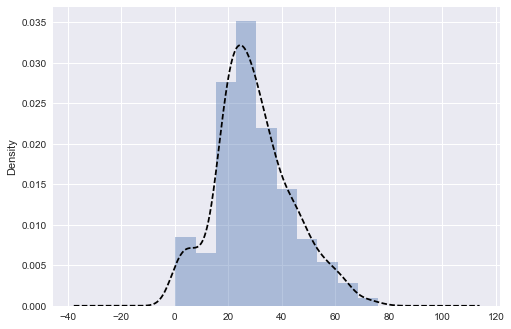

In [52]:
train.Age.hist(alpha = .4, normed = True)
train.Age.plot(kind ='kde', style = 'k--')

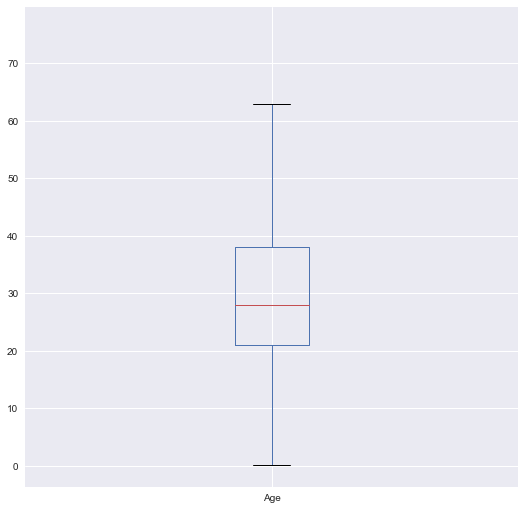

In [44]:
plt.figure(figsize=[30,30])
plt.subplot(331)
train.Age.plot(kind = 'box')

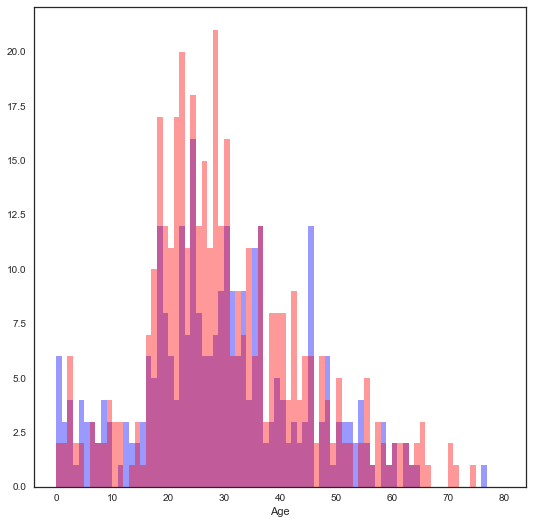

In [40]:
sns.distplot(surv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=surv_col)
sns.distplot(nosurv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=nosurv_col,
            axlabel='Age')

In [131]:

Sexn = train.Sex.map({'male': 1, 'female': 0})
train["Sexn"] = Sexn

In [132]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,PassengerId,Sexn
0,1,1,"Earnshaw, Mrs. Boulton (Olive Potter)",female,23.0000,0,1,11767,83.1583,C,1302,0
1,0,3,"van Billiard, Master. Walter John",male,11.5000,1,1,A/5. 851,14.5000,S,17,1
2,1,1,"Frauenthal, Dr. Henry William",male,50.0000,2,0,PC 17611,133.6500,S,1049,1
3,1,3,"Stranden, Mr. Juho",male,31.0000,0,0,STON/O 2. 3101288,7.9250,S,388,1
4,1,2,"Davis, Miss. Mary",female,28.0000,0,0,237668,13.0000,S,1060,0
5,0,2,"Stanton, Mr. Samuel Ward",male,41.0000,0,0,237734,15.0458,C,328,1
6,1,3,"Karun, Mr. Franz",male,39.0000,0,1,349256,13.4167,C,729,1
7,0,3,"Bostandyeff, Mr. Guentcho",male,26.0000,0,0,349224,7.8958,S,552,1
8,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0000,1,5,347082,31.2750,S,296,0
9,0,3,"Lindell, Mr. Edvard Bengtsson",male,36.0000,1,0,349910,15.5500,S,1257,1


In [133]:
train = train.dropna()

columns_X = ['Age', 'Sexn', 'Pclass', 'Fare']

X = train[columns_X]

scaler = preprocessing.MinMaxScaler().fit(X)

X = scaler.transform(X)

In [134]:
X

array([[ 0.30109859,  0.        ,  0.        ,  0.16231419],
       [ 0.14945018,  1.        ,  1.        ,  0.02830212],
       [ 0.65714271,  1.        ,  0.        ,  0.26086743],
       ..., 
       [ 0.56483497,  0.        ,  0.        ,  0.10821499],
       [ 0.19560404,  0.        ,  0.5       ,  0.07612293],
       [ 0.2351645 ,  1.        ,  1.        ,  0.06709553]])

In [135]:
type(X)

numpy.ndarray

In [136]:
X.shape

(698, 4)

In [137]:
pd.DataFrame(X, columns = columns_X).describe()

,Age,Sexn,Pclass,Fare
count,698.000000,698.000000,698.000000,698.000000
mean,0.386257,0.617479,0.608166,0.069223
std,0.187007,0.486351,0.420227,0.105626
min,0.000000,0.000000,0.000000,0.000000
25%,0.274725,0.000000,0.000000,0.015713
50%,0.367033,1.000000,0.500000,0.030726
75%,0.498901,1.000000,1.000000,0.067096
max,1.000000,1.000000,1.000000,1.000000


In [138]:
c = df.Survived

In [145]:
train_X, test_X, train_c, test_c = model_selection.train_test_split(X, c, train_size = .6)

In [152]:
model = neighbors.KNeighborsClassifier(n_neighbors = 9).\
    fit(train_X, train_c)

In [153]:
model.score(train_X, train_c)

0.77751196172248804

In [154]:
model.score(test_X, test_c)

0.78214285714285714

In [159]:
k_cv = 10 # 10-fold CV
k_nn = range(1, 20) # k-NN


In [162]:
gs = model_selection.GridSearchCV(
    estimator = neighbors.KNeighborsClassifier(),
    param_grid = {'n_neighbors': k_nn},
    cv = model_selection.KFold(n_splits = k_cv, shuffle = True, random_state = 0)
)

gs.fit(train_X, train_c)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 20)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [177]:
gs.cv_results_['mean_test_score']

array([ 0.72009569,  0.73684211,  0.77033493,  0.75837321,  0.76315789,
        0.74641148,  0.72488038,  0.73684211,  0.72966507,  0.75358852,
        0.75358852,  0.74880383,  0.73923445,  0.75358852,  0.74641148,
        0.76315789,  0.74880383,  0.76076555,  0.74880383])

In [166]:
gs.best_estimator_.score(train_X, train_c)

0.85167464114832536

In [168]:
model = gs.best_estimator_.fit(train_X, train_c)

In [169]:
model.score(train_X, train_c)

0.85167464114832536

In [170]:
model.score(test_X, test_c)

0.80000000000000004

In [143]:
Sex = pd.get_dummies(test['Sex'], prefix = None )
Sex.columns = ["male", "female"]

test.Sex = Sex.female

In [144]:
test

,Unnamed: 0,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,PassengerId
0,0,2,"Frost, Mr. Anthony Wood ""Archie""",1,NaN,0,0,239854,0.0000,S,0
1,2,3,"Danoff, Mr. Yoto",1,27.0000,0,0,349219,7.8958,S,2
2,4,2,"Jefferys, Mr. Clifford Thomas",1,24.0000,2,0,C.A. 31029,31.5000,S,4
3,6,3,"Sage, Miss. Ada",0,NaN,8,2,CA. 2343,69.5500,S,6
4,12,1,"Stahelin-Maeglin, Dr. Max",1,32.0000,0,0,13214,30.5000,C,12
5,13,2,"Bateman, Rev. Robert James",1,51.0000,0,0,S.O.P. 1166,12.5250,S,13
6,15,3,"Conlon, Mr. Thomas Henry",1,31.0000,0,0,21332,7.7333,Q,15
7,16,3,"Heikkinen, Miss. Laina",0,26.0000,0,0,STON/O2. 3101282,7.9250,S,16
8,18,3,"Masselmani, Mrs. Fatima",0,NaN,0,0,2649,7.2250,C,18
9,20,2,"Troutt, Miss. Edwina Celia ""Winnie""",0,27.0000,0,0,34218,10.5000,S,20
